# Data Exploration

In [ ]:
%load_ext autoreload
%autoreload 2

from assaiku.data import DataConfig, DataPipe
from assaiku.data.validation import load_and_validate
from assaiku.data.processing import remove_group_duplicates, filter_outliers

import pandas as pd

pd.set_option('display.max_columns', 50)

data_config = DataConfig(perform_exploration=False)

## Loading and validating data

In [2]:
train_df, test_df = load_and_validate(data_config=data_config)

## Handling duplicates

In [ ]:
train_df = remove_group_duplicates(train_df,weight_col=data_config.weight_col)
test_df = remove_group_duplicates(test_df,weight_col=data_config.weight_col)

Number of duplicates including instances_weights: 3229
Number of duplicates excluding instances_weights: 46627
Dropping duplicates including the instances_weight (systematic error)
Gropuping same instances and their weight instances
Removing age below 16
Number of samples after cleaning: 138669
Number of duplicates including instances_weights: 883
Number of duplicates excluding instances_weights: 20898
Dropping duplicates including the instances_weight (systematic error)
Gropuping same instances and their weight instances
Removing age below 16
Number of samples after cleaning: 70787


## Checking for outliers

Found 30 outlier in train set


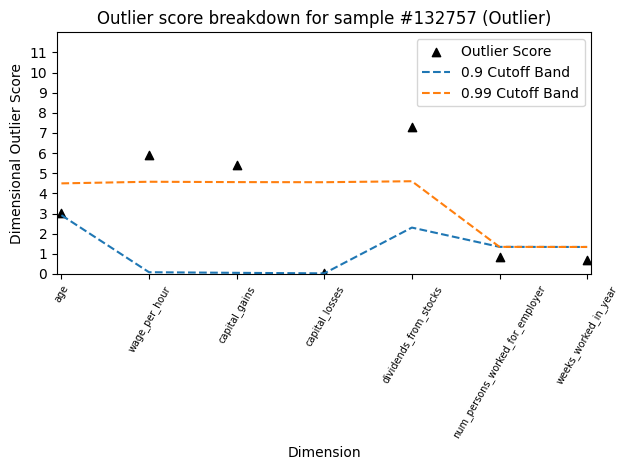

Found 12 outlier in test set
Filtering out outliers from train and test data


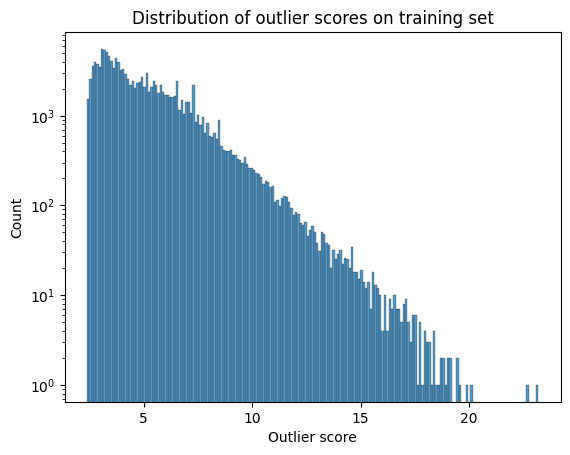

In [4]:
clean_train, clean_test = filter_outliers(train_data=train_df, 
                                          test_data=test_df, 
                                          numerical_cols=data_config.numerical_cols,
                                          threshold=data_config.threshold_outlier,
                                          folder_path="./preprocessing")

## Run all of this in one line

In [ ]:
data_pipeline = DataPipe(data_config=data_config)
data_pipeline.run()